<font color="black" face="Times New Roman" size="6"><b> Import Libraries </b></font> 

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import optuna
from optuna.trial import TrialState
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

<font color="black" face="Times New Roman" size="6"><b> Data Exploring and Preparing </b></font> 

<font color="black" face="Times New Roman" size="4"><b> Temperature </b></font> 

In [2]:
folder_path = r'G:\ml_projects\siedlce_air\2020_temp'

all_files = os.listdir(folder_path)

csv_files = [f for f in all_files if f.endswith('.csv')]

dfs = []

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df_sample = pd.read_csv(file_path)
    dfs.append(df_sample)

df_2020_temp = pd.concat(dfs, ignore_index=True)

In [3]:
df_2020_temp.shape

(355, 3)

In [4]:
df_2020_temp.head()

,category,minimum,maximum
0,1.6.2020,9,17.5
1,2.6.2020,6,18.2
2,3.6.2020,9,16.3
3,4.6.2020,9,17.6
4,5.6.2020,10,22.5


In [5]:
df_2020_temp.rename(columns={'category': 'Data'}, inplace=True)

In [6]:
df_2020_temp.head()

,Data,minimum,maximum
0,1.6.2020,9,17.5
1,2.6.2020,6,18.2
2,3.6.2020,9,16.3
3,4.6.2020,9,17.6
4,5.6.2020,10,22.5


In [7]:
df_2020_temp['avg'] = (df_2020_temp['minimum'] + df_2020_temp['maximum']) / 2

df_2020_temp.drop(['minimum', 'maximum'], axis=1, inplace=True)

df_2020_temp

,Data,avg
0,1.6.2020,13.25
1,2.6.2020,12.10
2,3.6.2020,12.65
3,4.6.2020,13.30
4,5.6.2020,16.25
...,...,...
350,26.9.2020,19.30
351,27.9.2020,12.95
352,28.9.2020,10.40
353,29.9.2020,12.00


In [8]:
df_2020_temp['Data'] = pd.to_datetime(df_2020_temp['Data'], format='%d.%m.%Y')
df_2020_temp = df_2020_temp.sort_values('Data')
df_2020_temp

,Data,avg
294,2020-01-01,2.25
295,2020-01-02,1.20
296,2020-01-03,0.25
297,2020-01-04,2.15
298,2020-01-05,-0.65
...,...,...
56,2020-12-27,-1.50
57,2020-12-28,1.90
58,2020-12-29,5.95
59,2020-12-30,4.25


In [9]:
all_range_time = pd.date_range(start=df_2020_temp['Data'].min(), end=df_2020_temp['Data'].max())

lost_time = all_range_time.difference(df_2020_temp['Data'])

print('Lost days in our data:', lost_time)

Lost days in our data: DatetimeIndex(['2020-08-13', '2020-08-20', '2020-10-08', '2020-10-09',
               '2020-10-10', '2020-10-22', '2020-11-19', '2020-11-23',
               '2020-11-24', '2020-11-25', '2020-11-26'],
              dtype='datetime64[ns]', freq=None)


In [10]:
folder_path = r'G:\ml_projects\siedlce_air\2021_temp'

all_files = os.listdir(folder_path)

csv_files_2021 = [f for f in all_files if f.endswith('.csv')]

dfs_2021 = []

for csv_file in csv_files_2021:
    file_path = os.path.join(folder_path, csv_file)
    df_sample = pd.read_csv(file_path)
    dfs_2021.append(df_sample)

df_2021_temp = pd.concat(dfs_2021, ignore_index=True)

In [11]:
df_2021_temp.shape

(356, 3)

In [12]:
df_2021_temp.head()

,category,minimum,maximum
0,1.6.2021,4,19.1
1,2.6.2021,7,20.1
2,3.6.2021,9,22.6
3,4.6.2021,8,24.3
4,5.6.2021,12,22.3


In [13]:
df_2021_temp['avg'] = (df_2021_temp['minimum'] + df_2021_temp['maximum']) / 2

df_2021_temp.drop(['minimum', 'maximum'], axis=1, inplace=True)

df_2021_temp

,category,avg
0,1.6.2021,11.55
1,2.6.2021,13.55
2,3.6.2021,15.80
3,4.6.2021,16.15
4,5.6.2021,17.15
...,...,...
351,26.9.2021,12.05
352,27.9.2021,9.80
353,28.9.2021,9.70
354,29.9.2021,10.90


In [14]:
df_2021_temp.rename(columns={'category': 'Data'}, inplace=True)

In [15]:
df_2021_temp.head()

,Data,avg
0,1.6.2021,11.55
1,2.6.2021,13.55
2,3.6.2021,15.80
3,4.6.2021,16.15
4,5.6.2021,17.15


In [16]:
df_2021_temp['Data'] = pd.to_datetime(df_2021_temp['Data'], format='%d.%m.%Y')
df_2021_temp = df_2021_temp.sort_values('Data')
df_2021_temp

,Data,avg
297,2021-01-02,0.65
298,2021-01-03,0.75
299,2021-01-04,2.05
300,2021-01-05,2.80
301,2021-01-06,1.50
...,...,...
55,2021-12-27,-11.35
56,2021-12-28,-7.45
57,2021-12-29,-5.10
58,2021-12-30,0.00


In [17]:
all_range_time_2021 = pd.date_range(start=df_2021_temp['Data'].min(), end=df_2021_temp['Data'].max())

lost_time_2021 = all_range_time_2021.difference(df_2021_temp['Data'])

print('Lost days in our data 2021:', lost_time_2021)

Lost days in our data 2021: DatetimeIndex(['2021-01-29', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-05-15', '2021-06-25'],
              dtype='datetime64[ns]', freq=None)


In [18]:
folder_path = r'G:\ml_projects\siedlce_air\2022_temp'

all_files = os.listdir(folder_path)

csv_files_2022 = [f for f in all_files if f.endswith('.csv')]

dfs_2022 = []

for csv_file in csv_files_2022:
    file_path = os.path.join(folder_path, csv_file)
    df_sample = pd.read_csv(file_path)
    dfs_2022.append(df_sample)

df_2022_temp = pd.concat(dfs_2022, ignore_index=True)

In [19]:
df_2022_temp.shape

(359, 3)

In [20]:
df_2022_temp.head()

,category,minimum,maximum
0,1.6.2022,10,19.9
1,2.6.2022,8,19.3
2,3.6.2022,5,21.8
3,4.6.2022,9,22.3
4,5.6.2022,11,23.1


In [21]:
df_2022_temp.rename(columns={'category': 'Data'}, inplace=True)

In [22]:
df_2022_temp.head()

,Data,minimum,maximum
0,1.6.2022,10,19.9
1,2.6.2022,8,19.3
2,3.6.2022,5,21.8
3,4.6.2022,9,22.3
4,5.6.2022,11,23.1


In [23]:
df_2022_temp['avg'] = (df_2022_temp['minimum'] + df_2022_temp['maximum']) / 2

df_2022_temp.drop(['minimum', 'maximum'], axis=1, inplace=True)

df_2022_temp

,Data,avg
0,1.6.2022,14.95
1,2.6.2022,13.65
2,3.6.2022,13.40
3,4.6.2022,15.65
4,5.6.2022,17.05
...,...,...
354,26.9.2022,11.10
355,27.9.2022,10.90
356,28.9.2022,11.15
357,29.9.2022,6.65


In [24]:
df_2022_temp['Data'] = pd.to_datetime(df_2022_temp['Data'], format='%d.%m.%Y')
df_2022_temp = df_2022_temp.sort_values('Data')
df_2022_temp

,Data,avg
298,2022-01-01,6.80
299,2022-01-02,4.25
300,2022-01-03,7.35
301,2022-01-04,5.30
302,2022-01-05,3.90
...,...,...
56,2022-12-27,5.60
57,2022-12-28,2.05
58,2022-12-29,4.45
59,2022-12-30,5.35


In [25]:
all_range_time_2022 = pd.date_range(start=df_2022_temp['Data'].min(), end=df_2022_temp['Data'].max())

lost_time_2022 = all_range_time_2022.difference(df_2022_temp['Data'])

print('Lost days in our data 2022:', lost_time_2022)

Lost days in our data 2022: DatetimeIndex(['2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20',
               '2022-04-21', '2022-05-08'],
              dtype='datetime64[ns]', freq=None)


<font color="black" face="Times New Roman" size="4"><b> Pollution PM2.5 </b></font> 

In [26]:
df_pm_25_2020 = pd.read_csv(r'G:\ml_projects\siedlce_air\pollution\gios-pjp-data_pm25_2020.csv')

In [27]:
df_pm_25_2020.head()

,Data and time,pollution PM2.5 [ug/m3]
2020-01-01 01:00,10.0,NaN
2020-01-01 02:00,6.2,NaN
2020-01-01 03:00,6.5,NaN
2020-01-01 04:00,11.8,NaN
2020-01-01 05:00,8.9,NaN


In [28]:
df_pm_25_2020.reset_index(inplace=True)

In [29]:
df_pm_25_2020.head()

,index,Data and time,pollution PM2.5 [ug/m3]
0,2020-01-01 01:00,10.0,NaN
1,2020-01-01 02:00,6.2,NaN
2,2020-01-01 03:00,6.5,NaN
3,2020-01-01 04:00,11.8,NaN
4,2020-01-01 05:00,8.9,NaN


In [30]:
pollution = df_pm_25_2020.columns[-1]
df_pm_25_2020 = df_pm_25_2020.drop(pollution, axis=1)
df_pm_25_2020.columns = ['Data and time', 'pollution PM2.5 [ug/m3]']

In [31]:
df_pm_25_2020.head()

,Data and time,pollution PM2.5 [ug/m3]
0,2020-01-01 01:00,10.0
1,2020-01-01 02:00,6.2
2,2020-01-01 03:00,6.5
3,2020-01-01 04:00,11.8
4,2020-01-01 05:00,8.9


In [32]:
df_pm_25_2020.shape

(8783, 2)

In [33]:
df_pm_25_2020['Data and time'] = pd.to_datetime(df_pm_25_2020['Data and time']) 

df_pm_25_2020['Data'] = df_pm_25_2020['Data and time'].dt.date

df_pm_25_2020 = df_pm_25_2020.groupby('Data').mean().reset_index()

In [34]:
df_pm_25_2020.shape

(367, 2)

In [35]:
df_pm_25_2020.head()

,Data,pollution PM2.5 [ug/m3]
0,2020-01-01,14.773913
1,2020-01-02,24.275000
2,2020-01-03,37.362500
3,2020-01-04,12.004167
4,2020-01-05,11.116667


In [36]:
df_pm_25_2021 = pd.read_csv(r'G:\ml_projects\siedlce_air\pollution\gios-pjp-data_pm25_2021.csv')

In [37]:
df_pm_25_2021.head()

,Data and time,pollution PM2.5 [ug/m3]
2021-01-01 01:00,42.1,NaN
2021-01-01 02:00,22.4,NaN
2021-01-01 03:00,19.3,NaN
2021-01-01 04:00,20.8,NaN
2021-01-01 05:00,21.2,NaN


In [38]:
df_pm_25_2021.reset_index(inplace=True)

In [39]:
df_pm_25_2021.head()

,index,Data and time,pollution PM2.5 [ug/m3]
0,2021-01-01 01:00,42.1,NaN
1,2021-01-01 02:00,22.4,NaN
2,2021-01-01 03:00,19.3,NaN
3,2021-01-01 04:00,20.8,NaN
4,2021-01-01 05:00,21.2,NaN


In [40]:
pollution = df_pm_25_2021.columns[-1]
df_pm_25_2021 = df_pm_25_2021.drop(pollution, axis=1)
df_pm_25_2021.columns = ['Data and time', 'pollution PM2.5 [ug/m3]']

In [41]:
df_pm_25_2021.head()

,Data and time,pollution PM2.5 [ug/m3]
0,2021-01-01 01:00,42.1
1,2021-01-01 02:00,22.4
2,2021-01-01 03:00,19.3
3,2021-01-01 04:00,20.8
4,2021-01-01 05:00,21.2


In [42]:
df_pm_25_2021['Data and time'] = pd.to_datetime(df_pm_25_2021['Data and time']) 

df_pm_25_2021['Data'] = df_pm_25_2021['Data and time'].dt.date

df_pm_25_2021 = df_pm_25_2021.groupby('Data').mean().reset_index()

In [43]:
df_pm_25_2021.shape

(366, 2)

In [44]:
df_pm_25_2021.head()

,Data,pollution PM2.5 [ug/m3]
0,2021-01-01,25.630435
1,2021-01-02,40.258333
2,2021-01-03,36.762500
3,2021-01-04,26.550000
4,2021-01-05,13.358333


In [45]:
df_pm_25_2022 = pd.read_csv(r'G:\ml_projects\siedlce_air\pollution\gios-pjp-data_pm25_2022.csv')

In [46]:
df_pm_25_2022.head()

,Data and time,pollution PM2.5 [ug/m3]
2022-01-01 01:00,17.5,NaN
2022-01-01 02:00,8.2,NaN
2022-01-01 03:00,8.1,NaN
2022-01-01 04:00,7.3,NaN
2022-01-01 05:00,7.3,NaN


In [47]:
df_pm_25_2022.reset_index(inplace=True)

In [48]:
df_pm_25_2022.head()

,index,Data and time,pollution PM2.5 [ug/m3]
0,2022-01-01 01:00,17.5,NaN
1,2022-01-01 02:00,8.2,NaN
2,2022-01-01 03:00,8.1,NaN
3,2022-01-01 04:00,7.3,NaN
4,2022-01-01 05:00,7.3,NaN


In [49]:
pollution = df_pm_25_2022.columns[-1]
df_pm_25_2022 = df_pm_25_2022.drop(pollution, axis=1)
df_pm_25_2022.columns = ['Data and time', 'pollution PM2.5 [ug/m3]']

In [50]:
df_pm_25_2022.head()

,Data and time,pollution PM2.5 [ug/m3]
0,2022-01-01 01:00,17.5
1,2022-01-01 02:00,8.2
2,2022-01-01 03:00,8.1
3,2022-01-01 04:00,7.3
4,2022-01-01 05:00,7.3


In [51]:
df_pm_25_2022['Data and time'] = pd.to_datetime(df_pm_25_2022['Data and time'])  

df_pm_25_2022['Data'] = df_pm_25_2022['Data and time'].dt.date

df_pm_25_2022 = df_pm_25_2022.groupby('Data').mean().reset_index()

In [52]:
df_pm_25_2022.shape

(366, 2)

In [53]:
df_pm_25_2022.head()

,Data,pollution PM2.5 [ug/m3]
0,2022-01-01,6.930435
1,2022-01-02,15.441667
2,2022-01-03,10.700000
3,2022-01-04,15.662500
4,2022-01-05,14.012500


In [54]:
df_pm_25_2020

,Data,pollution PM2.5 [ug/m3]
0,2020-01-01,14.773913
1,2020-01-02,24.275000
2,2020-01-03,37.362500
3,2020-01-04,12.004167
4,2020-01-05,11.116667
...,...,...
362,2020-12-28,15.550000
363,2020-12-29,13.825000
364,2020-12-30,23.000000
365,2020-12-31,23.862500


In [55]:
df_pm_25_2021

,Data,pollution PM2.5 [ug/m3]
0,2021-01-01,25.630435
1,2021-01-02,40.258333
2,2021-01-03,36.762500
3,2021-01-04,26.550000
4,2021-01-05,13.358333
...,...,...
361,2021-12-28,21.625000
362,2021-12-29,27.600000
363,2021-12-30,48.287500
364,2021-12-31,15.575000


In [56]:
df_pm_25_2022

,Data,pollution PM2.5 [ug/m3]
0,2022-01-01,6.930435
1,2022-01-02,15.441667
2,2022-01-03,10.700000
3,2022-01-04,15.662500
4,2022-01-05,14.012500
...,...,...
361,2022-12-28,13.329167
362,2022-12-29,13.683333
363,2022-12-30,19.479167
364,2022-12-31,15.862500


In [57]:
last_index_20 = df_pm_25_2020.index[-1]
df_pm_25_2020 = df_pm_25_2020.drop(last_index_20)
last_index_21 = df_pm_25_2021.index[-1]
df_pm_25_2021 = df_pm_25_2021.drop(last_index_21)
last_index_22 = df_pm_25_2022.index[-1]
df_pm_25_2022 = df_pm_25_2022.drop(last_index_22)

In [58]:
df_pm_25_2020.shape, df_pm_25_2021.shape, df_pm_25_2022.shape

((366, 2), (365, 2), (365, 2))

<font color="black" face="Times New Roman" size="4"><b> Pollution PM10</b></font> 

In [59]:
df_pm_10 = pd.read_csv(r'G:\ml_projects\siedlce_air\pollution\gios-pjp-data_pm_10.csv')

In [60]:
df_pm_10.head()

,Data and time,pollution PM10 [ug/m3]
2020-01-01,16.7,NaN
2020-01-02,31.3,NaN
2020-01-03,42.5,NaN
2020-01-04,13.1,NaN
2020-01-05,13.6,NaN


In [61]:
df_pm_10.reset_index(inplace=True)

In [62]:
df_pm_10.head()

,index,Data and time,pollution PM10 [ug/m3]
0,2020-01-01,16.7,NaN
1,2020-01-02,31.3,NaN
2,2020-01-03,42.5,NaN
3,2020-01-04,13.1,NaN
4,2020-01-05,13.6,NaN


In [63]:
pollution = df_pm_10.columns[-1]
df_pm_10 = df_pm_10.drop(pollution, axis=1)
df_pm_10.columns = ['Data', 'pollution PM10 [ug/m3]']

In [64]:
df_pm_10.head()

,Data,pollution PM10 [ug/m3]
0,2020-01-01,16.7
1,2020-01-02,31.3
2,2020-01-03,42.5
3,2020-01-04,13.1
4,2020-01-05,13.6


In [65]:
df_pm_10.shape

(1096, 2)

In [66]:
df_pm_10

,Data,pollution PM10 [ug/m3]
0,2020-01-01,16.7
1,2020-01-02,31.3
2,2020-01-03,42.5
3,2020-01-04,13.1
4,2020-01-05,13.6
...,...,...
1091,2022-12-27,12.3
1092,2022-12-28,16.2
1093,2022-12-29,16.8
1094,2022-12-30,26.0


<font color="black" face="Times New Roman" size="2"><b> Creating Data Frame for analysis </b></font> 

In [67]:
df_pollution_25 = pd.merge(df_pm_25_2020, df_pm_25_2021, on='Data', how='outer')
df_pollution_25 = pd.merge(df_pollution_25, df_pm_25_2022, on='Data', how='outer')

In [68]:
df_pollution_25.shape

(1096, 4)

In [69]:
df_pollution_25

,Data,pollution PM2.5 [ug/m3]_x,pollution PM2.5 [ug/m3]_y,pollution PM2.5 [ug/m3]
0,2020-01-01,14.773913,NaN,NaN
1,2020-01-02,24.275000,NaN,NaN
2,2020-01-03,37.362500,NaN,NaN
3,2020-01-04,12.004167,NaN,NaN
4,2020-01-05,11.116667,NaN,NaN
...,...,...,...,...
1091,2022-12-27,NaN,NaN,10.579167
1092,2022-12-28,NaN,NaN,13.329167
1093,2022-12-29,NaN,NaN,13.683333
1094,2022-12-30,NaN,NaN,19.479167


In [70]:
df_pollution_25['pollution air PM2.5 [ug/m3]'] = df_pollution_25[['pollution PM2.5 [ug/m3]_x', 'pollution PM2.5 [ug/m3]_y', 'pollution PM2.5 [ug/m3]']].mean(axis=1)

In [71]:
df_pollution_25.drop(['pollution PM2.5 [ug/m3]_x', 'pollution PM2.5 [ug/m3]_y', 'pollution PM2.5 [ug/m3]'], axis=1, inplace=True)

In [72]:
df_pollution_25

,Data,pollution air PM2.5 [ug/m3]
0,2020-01-01,14.773913
1,2020-01-02,24.275000
2,2020-01-03,37.362500
3,2020-01-04,12.004167
4,2020-01-05,11.116667
...,...,...
1091,2022-12-27,10.579167
1092,2022-12-28,13.329167
1093,2022-12-29,13.683333
1094,2022-12-30,19.479167


In [73]:
df_pollution_25['Data'] = pd.to_datetime(df_pollution_25['Data'])
df_pm_10['Data'] = pd.to_datetime(df_pm_10['Data'])

In [74]:
df_pollution = pd.merge(df_pollution_25, df_pm_10, on='Data', how='outer')

In [75]:
df_pollution

,Data,pollution air PM2.5 [ug/m3],pollution PM10 [ug/m3]
0,2020-01-01,14.773913,16.7
1,2020-01-02,24.275000,31.3
2,2020-01-03,37.362500,42.5
3,2020-01-04,12.004167,13.1
4,2020-01-05,11.116667,13.6
...,...,...,...
1091,2022-12-27,10.579167,12.3
1092,2022-12-28,13.329167,16.2
1093,2022-12-29,13.683333,16.8
1094,2022-12-30,19.479167,26.0


In [76]:
df_temp = pd.merge(df_2020_temp, df_2021_temp, on='Data', how='outer')
df_temp = pd.merge(df_temp, df_2022_temp, on='Data', how='outer')

In [77]:
df_temp

,Data,avg_x,avg_y,avg
0,2020-01-01,2.25,NaN,NaN
1,2020-01-02,1.20,NaN,NaN
2,2020-01-03,0.25,NaN,NaN
3,2020-01-04,2.15,NaN,NaN
4,2020-01-05,-0.65,NaN,NaN
...,...,...,...,...
1065,2022-12-27,NaN,NaN,5.60
1066,2022-12-28,NaN,NaN,2.05
1067,2022-12-29,NaN,NaN,4.45
1068,2022-12-30,NaN,NaN,5.35


In [78]:
df_temp['Temp [C]'] = df_temp[['avg_x', 'avg_y', 'avg']].mean(axis=1)

In [79]:
df_temp.drop(['avg_x', 'avg_y', 'avg'], axis=1, inplace=True)

In [80]:
df_temp

,Data,Temp [C]
0,2020-01-01,2.25
1,2020-01-02,1.20
2,2020-01-03,0.25
3,2020-01-04,2.15
4,2020-01-05,-0.65
...,...,...
1065,2022-12-27,5.60
1066,2022-12-28,2.05
1067,2022-12-29,4.45
1068,2022-12-30,5.35


In [81]:
df = pd.merge(df_temp, df_pollution, on='Data', how='outer')

In [82]:
df

,Data,Temp [C],pollution air PM2.5 [ug/m3],pollution PM10 [ug/m3]
0,2020-01-01,2.25,14.773913,16.7
1,2020-01-02,1.20,24.275000,31.3
2,2020-01-03,0.25,37.362500,42.5
3,2020-01-04,2.15,12.004167,13.1
4,2020-01-05,-0.65,11.116667,13.6
...,...,...,...,...
1091,2022-04-18,NaN,11.875000,14.5
1092,2022-04-19,NaN,9.454167,11.6
1093,2022-04-20,NaN,11.958333,14.7
1094,2022-04-21,NaN,14.504167,19.0


In [83]:
df.dropna(inplace=True)

In [84]:
df

,Data,Temp [C],pollution air PM2.5 [ug/m3],pollution PM10 [ug/m3]
0,2020-01-01,2.25,14.773913,16.7
1,2020-01-02,1.20,24.275000,31.3
2,2020-01-03,0.25,37.362500,42.5
3,2020-01-04,2.15,12.004167,13.1
4,2020-01-05,-0.65,11.116667,13.6
...,...,...,...,...
1065,2022-12-27,5.60,10.579167,12.3
1066,2022-12-28,2.05,13.329167,16.2
1067,2022-12-29,4.45,13.683333,16.8
1068,2022-12-30,5.35,19.479167,26.0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 0 to 1069
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         1067 non-null   datetime64[ns]
 1   Temp [C]                     1067 non-null   float64       
 2   pollution air PM2.5 [ug/m3]  1067 non-null   float64       
 3   pollution PM10 [ug/m3]       1067 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 41.7+ KB


In [86]:
df['pollution PM10 [ug/m3]'] = pd.to_numeric(df['pollution PM10 [ug/m3]'], errors='coerce')

In [87]:
nan_count = df['pollution PM10 [ug/m3]'].isna().sum()
nan_count

9

In [88]:
df.dropna(inplace=True)

In [89]:
df

,Data,Temp [C],pollution air PM2.5 [ug/m3],pollution PM10 [ug/m3]
0,2020-01-01,2.25,14.773913,16.7
1,2020-01-02,1.20,24.275000,31.3
2,2020-01-03,0.25,37.362500,42.5
3,2020-01-04,2.15,12.004167,13.1
4,2020-01-05,-0.65,11.116667,13.6
...,...,...,...,...
1065,2022-12-27,5.60,10.579167,12.3
1066,2022-12-28,2.05,13.329167,16.2
1067,2022-12-29,4.45,13.683333,16.8
1068,2022-12-30,5.35,19.479167,26.0


In [90]:
df.describe()

,Temp [C],pollution air PM2.5 [ug/m3],pollution PM10 [ug/m3]
count,1058.000000,1058.000000,1058.000000
mean,9.036437,18.115629,25.222590
std,7.976629,12.713115,15.276594
min,-17.950000,3.104167,4.300000
25%,2.850000,9.625000,15.100000
50%,8.875000,14.456250,21.150000
75%,15.487500,22.435417,31.200000
max,27.900000,116.545833,125.100000


In [91]:
correlation_matrix = df.corr()
correlation_matrix

,Temp [C],pollution air PM2.5 [ug/m3],pollution PM10 [ug/m3]
Temp [C],1.000000,-0.526185,-0.324300
pollution air PM2.5 [ug/m3],-0.526185,1.000000,0.918907
pollution PM10 [ug/m3],-0.324300,0.918907,1.000000


<font color="black" face="Times New Roman" size="4"><b> Creating Air Quality </b></font> 

<font color="black" face="Times New Roman" size="1"><b> Fig. shows the depence between air quality and pollution concentration  </b></font> 

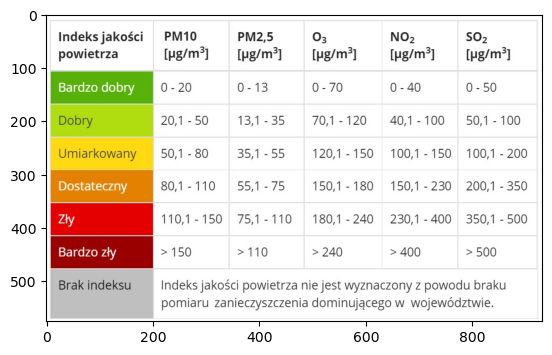

In [92]:
img = mpimg.imread('G:\ml_projects\siedlce_air\skale.jpg')
imgplot = plt.imshow(img)
plt.show()

In [93]:
def air_quality(pm10, pm25):
    quality_10 = ''
    quality_25 = ''
    
    if pm10 <= 20:
        quality_10 = 'Very Good'
    elif 20 < pm10 <= 50:
        quality_10 = 'Good'
    elif 50 < pm10 <= 80:
        quality_10 = 'Moderate'
    elif 80 < pm10 <= 110:
        quality_10 = 'Sufficient'
    elif 110 < pm10 <= 150:
        quality_10 = 'Poor'
    else:
        quality_10 = 'Very Poor'
        
    if pm25 <= 13:
        quality_25 = 'Very Good'
    elif 13 < pm25 <= 35:
        quality_25 = 'Good'
    elif 35 < pm25 <= 55:
        quality_25 = 'Moderate'
    elif 55 < pm25 <= 75:
        quality_25 = 'Sufficient'
    elif 75 < pm25 <= 110:
        quality_25 = 'Poor'
    else:
        quality_25 = 'Very Poor'
    
    quality_levels = ['Very Good', 'Good', 'Moderate', 'Sufficient', 'Poor', 'Very Poor']
    return quality_levels[max(quality_levels.index(quality_10), quality_levels.index(quality_25))]

df['Air Quality'] = df.apply(lambda row: air_quality(row['pollution PM10 [ug/m3]'], row['pollution air PM2.5 [ug/m3]']), axis=1)
df

,Data,Temp [C],pollution air PM2.5 [ug/m3],pollution PM10 [ug/m3],Air Quality
0,2020-01-01,2.25,14.773913,16.7,Good
1,2020-01-02,1.20,24.275000,31.3,Good
2,2020-01-03,0.25,37.362500,42.5,Moderate
3,2020-01-04,2.15,12.004167,13.1,Very Good
4,2020-01-05,-0.65,11.116667,13.6,Very Good
...,...,...,...,...,...
1065,2022-12-27,5.60,10.579167,12.3,Very Good
1066,2022-12-28,2.05,13.329167,16.2,Good
1067,2022-12-29,4.45,13.683333,16.8,Good
1068,2022-12-30,5.35,19.479167,26.0,Good


<font color="black" face="Times New Roman" size="4"><b> Creating Season, Free Days and Weekends</b></font> 

In [94]:
def get_season(date):
    if (date.month == 12 and date.day >= 21) or (date.month == 1) or (date.month == 2) or (date.month == 3 and date.day < 21):
        return 'Winter'
    elif (date.month == 3 and date.day >= 21) or (date.month == 4) or (date.month == 5) or (date.month == 6 and date.day < 21):
        return 'Spring'
    elif (date.month == 6 and date.day >= 21) or (date.month == 7) or (date.month == 8) or (date.month == 9 and date.day < 23):
        return 'Summer'
    elif (date.month == 9 and date.day >= 23) or (date.month == 10) or (date.month == 11) or (date.month == 12 and date.day < 21):
        return 'Autumn'
df['season'] = df['Data'].apply(get_season)

In [95]:
df['Day'] = df['Data'].dt.day_name()
df['weekend'] = df['Day'].isin(['Saturday', 'Sunday']).astype(int)
free_days = ['2020-01-01', '2020-01-06', '2020-04-12', '2020-04-13', '2020-05-01', '2020-05-03', '2020-06-11', '2020-08-15', '2020-11-01', '2020-11-11', '2020-12-25', '2020-12-26', 
             '2021-01-01', '2021-01-06', '2021-04-04', '2021-04-05', '2021-05-01', '2021-05-03', '2021-06-03', '2021-08-15', '2021-11-01', '2021-11-11', '2021-12-25', '2021-12-26', 
             '2022-01-01', '2022-01-06', '2022-04-17', '2022-04-18', '2022-05-01', '2022-05-03', '2022-06-16', '2022-08-15', '2022-11-01', '2022-11-11', '2022-12-25', '2022-12-26']
free_days = pd.to_datetime(free_days)
df['free_day'] = df['Data'].isin(free_days).astype(int)
df['free_day_or_weekend'] = (df['weekend'] | df['free_day']).astype(int)

In [96]:
df.drop(['Day', 'weekend', 'free_day'], axis=1, inplace=True)

In [97]:
df

,Data,Temp [C],pollution air PM2.5 [ug/m3],pollution PM10 [ug/m3],Air Quality,season,free_day_or_weekend
0,2020-01-01,2.25,14.773913,16.7,Good,Winter,1
1,2020-01-02,1.20,24.275000,31.3,Good,Winter,0
2,2020-01-03,0.25,37.362500,42.5,Moderate,Winter,0
3,2020-01-04,2.15,12.004167,13.1,Very Good,Winter,1
4,2020-01-05,-0.65,11.116667,13.6,Very Good,Winter,1
...,...,...,...,...,...,...,...
1065,2022-12-27,5.60,10.579167,12.3,Very Good,Winter,0
1066,2022-12-28,2.05,13.329167,16.2,Good,Winter,0
1067,2022-12-29,4.45,13.683333,16.8,Good,Winter,0
1068,2022-12-30,5.35,19.479167,26.0,Good,Winter,0


In [98]:
season_mapping = {
    'Winter': 0,
    'Spring': 1,
    'Summer': 2,
    'Autumn': 3
}
df['season'] = df['season'].map(season_mapping)
df

,Data,Temp [C],pollution air PM2.5 [ug/m3],pollution PM10 [ug/m3],Air Quality,season,free_day_or_weekend
0,2020-01-01,2.25,14.773913,16.7,Good,0,1
1,2020-01-02,1.20,24.275000,31.3,Good,0,0
2,2020-01-03,0.25,37.362500,42.5,Moderate,0,0
3,2020-01-04,2.15,12.004167,13.1,Very Good,0,1
4,2020-01-05,-0.65,11.116667,13.6,Very Good,0,1
...,...,...,...,...,...,...,...
1065,2022-12-27,5.60,10.579167,12.3,Very Good,0,0
1066,2022-12-28,2.05,13.329167,16.2,Good,0,0
1067,2022-12-29,4.45,13.683333,16.8,Good,0,0
1068,2022-12-30,5.35,19.479167,26.0,Good,0,0


In [99]:
col_to_move = df.pop('Air Quality')
df['Air Quality'] = col_to_move
df

,Data,Temp [C],pollution air PM2.5 [ug/m3],pollution PM10 [ug/m3],season,free_day_or_weekend,Air Quality
0,2020-01-01,2.25,14.773913,16.7,0,1,Good
1,2020-01-02,1.20,24.275000,31.3,0,0,Good
2,2020-01-03,0.25,37.362500,42.5,0,0,Moderate
3,2020-01-04,2.15,12.004167,13.1,0,1,Very Good
4,2020-01-05,-0.65,11.116667,13.6,0,1,Very Good
...,...,...,...,...,...,...,...
1065,2022-12-27,5.60,10.579167,12.3,0,0,Very Good
1066,2022-12-28,2.05,13.329167,16.2,0,0,Good
1067,2022-12-29,4.45,13.683333,16.8,0,0,Good
1068,2022-12-30,5.35,19.479167,26.0,0,0,Good


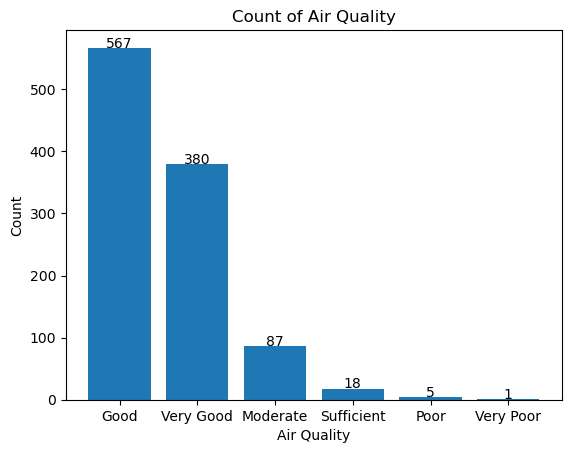

In [100]:
counts = df['Air Quality'].value_counts()

plt.bar(counts.index, counts.values)
for index, value in enumerate(counts.values):
    plt.text(index, value + 0.5, str(value), ha='center')
plt.xlabel('Air Quality')
plt.ylabel('Count')
plt.title('Count of Air Quality')
plt.show()

In [101]:
quality_mapping = {
    'Very Good': 1,
    'Good': 2,
    'Moderate': 3,
    'Sufficient': 4,
    'Poor': 5,
    'Very Poor': 6
}
df['Air Quality'] = df['Air Quality'].replace(quality_mapping)
df

,Data,Temp [C],pollution air PM2.5 [ug/m3],pollution PM10 [ug/m3],season,free_day_or_weekend,Air Quality
0,2020-01-01,2.25,14.773913,16.7,0,1,2
1,2020-01-02,1.20,24.275000,31.3,0,0,2
2,2020-01-03,0.25,37.362500,42.5,0,0,3
3,2020-01-04,2.15,12.004167,13.1,0,1,1
4,2020-01-05,-0.65,11.116667,13.6,0,1,1
...,...,...,...,...,...,...,...
1065,2022-12-27,5.60,10.579167,12.3,0,0,1
1066,2022-12-28,2.05,13.329167,16.2,0,0,2
1067,2022-12-29,4.45,13.683333,16.8,0,0,2
1068,2022-12-30,5.35,19.479167,26.0,0,0,2


<font color="black" face="Times New Roman" size="4"><b> Precipitation </b></font> 

In [102]:
folder_path = r'G:\ml_projects\siedlce_air\hydro_2020'

all_files = os.listdir(folder_path)

csv_files = [f for f in all_files if f.endswith('.csv')]

dfs = []

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df_sample = pd.read_csv(file_path)
    dfs.append(df_sample)

df_2020_hydro = pd.concat(dfs, ignore_index=True)

In [103]:
df_2020_hydro.shape

(351, 2)

In [104]:
df_2020_hydro

,category,Opady w mm
0,1.6.2020,0.0
1,2.6.2020,0.0
2,3.6.2020,0.3
3,4.6.2020,0.5
4,5.6.2020,0.0
...,...,...
346,26.9.2020,0.0
347,27.9.2020,13.5
348,28.9.2020,10.9
349,29.9.2020,0.0


In [105]:
df_2020_hydro.rename(columns={'category': 'Data'}, inplace=True)
df_2020_hydro.rename(columns={'Opady w mm': 'Precipitation [mm]'}, inplace=True)
df_2020_hydro['Data'] = pd.to_datetime(df_2020_hydro['Data'], format='%d.%m.%Y')
df_2020_hydro = df_2020_hydro.sort_values('Data')
df_2020_hydro

,Data,Precipitation [mm]
290,2020-01-01,1.5
291,2020-01-02,0.0
292,2020-01-03,0.0
293,2020-01-04,0.3
294,2020-01-05,2.5
...,...,...
55,2020-12-27,0.0
56,2020-12-28,0.0
57,2020-12-29,0.0
58,2020-12-30,6.6


In [106]:
all_range_time = pd.date_range(start=df_2020_hydro['Data'].min(), end=df_2020_hydro['Data'].max())

lost_time = all_range_time.difference(df_2020_hydro['Data'])

print('Lost days in our data:', lost_time)

Lost days in our data: DatetimeIndex(['2020-08-13', '2020-08-20', '2020-10-08', '2020-10-09',
               '2020-10-10', '2020-10-22', '2020-10-27', '2020-11-11',
               '2020-11-16', '2020-11-19', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-26', '2020-12-08'],
              dtype='datetime64[ns]', freq=None)


In [107]:
folder_path = r'G:\ml_projects\siedlce_air\hydro_2021'

all_files = os.listdir(folder_path)

csv_files = [f for f in all_files if f.endswith('.csv')]

dfs = []

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df_sample = pd.read_csv(file_path)
    dfs.append(df_sample)

df_2021_hydro = pd.concat(dfs, ignore_index=True)
df_2021_hydro

,category,Opady w mm
0,1.6.2021,0.0
1,2.6.2021,0.0
2,3.6.2021,0.0
3,4.6.2021,0.0
4,5.6.2021,0.3
...,...,...
351,26.9.2021,0.0
352,27.9.2021,0.0
353,28.9.2021,0.0
354,29.9.2021,0.0


In [108]:
df_2021_hydro.rename(columns={'category': 'Data'}, inplace=True)
df_2021_hydro.rename(columns={'Opady w mm': 'Precipitation [mm]'}, inplace=True)
df_2021_hydro['Data'] = pd.to_datetime(df_2021_hydro['Data'], format='%d.%m.%Y')
df_2021_hydro = df_2021_hydro.sort_values('Data')
df_2021_hydro

,Data,Precipitation [mm]
297,2021-01-02,0.0
298,2021-01-03,0.8
299,2021-01-04,0.0
300,2021-01-05,3.1
301,2021-01-06,10.2
...,...,...
55,2021-12-27,0.0
56,2021-12-28,0.0
57,2021-12-29,0.0
58,2021-12-30,0.5


In [109]:
all_range_time = pd.date_range(start=df_2021_hydro['Data'].min(), end=df_2021_hydro['Data'].max())

lost_time = all_range_time.difference(df_2021_hydro['Data'])

print('Lost days in our data:', lost_time)

Lost days in our data: DatetimeIndex(['2021-01-29', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-05-15', '2021-06-25'],
              dtype='datetime64[ns]', freq=None)


In [110]:
folder_path = r'G:\ml_projects\siedlce_air\hydro_2022'

all_files = os.listdir(folder_path)

csv_files = [f for f in all_files if f.endswith('.csv')]

dfs = []

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df_sample = pd.read_csv(file_path)
    dfs.append(df_sample)

df_2022_hydro = pd.concat(dfs, ignore_index=True)
df_2022_hydro

,category,Opady w mm
0,1.6.2022,1.5
1,2.6.2022,2.3
2,3.6.2022,0.5
3,4.6.2022,0.0
4,5.6.2022,0.3
...,...,...
353,26.9.2022,0.0
354,27.9.2022,0.0
355,28.9.2022,12.2
356,29.9.2022,5.1


In [111]:
df_2022_hydro.rename(columns={'category': 'Data'}, inplace=True)
df_2022_hydro.rename(columns={'Opady w mm': 'Precipitation [mm]'}, inplace=True)
df_2022_hydro['Data'] = pd.to_datetime(df_2022_hydro['Data'], format='%d.%m.%Y')
df_2022_hydro = df_2022_hydro.sort_values('Data')
df_2022_hydro

,Data,Precipitation [mm]
297,2022-01-01,4.8
298,2022-01-02,0.0
299,2022-01-03,3.6
300,2022-01-04,1.3
301,2022-01-05,4.6
...,...,...
56,2022-12-27,13.2
57,2022-12-28,0.0
58,2022-12-29,0.5
59,2022-12-30,0.0


In [112]:
all_range_time = pd.date_range(start=df_2022_hydro['Data'].min(), end=df_2022_hydro['Data'].max())

lost_time = all_range_time.difference(df_2022_hydro['Data'])

print('Lost days in our data:', lost_time)

Lost days in our data: DatetimeIndex(['2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20',
               '2022-04-21', '2022-05-08', '2022-07-30'],
              dtype='datetime64[ns]', freq=None)


<font color="black" face="Times New Roman" size="4"><b> Wind Speed </b></font> 

In [113]:
folder_path = r'G:\ml_projects\siedlce_air\wind_2020'

all_files = os.listdir(folder_path)

csv_files = [f for f in all_files if f.endswith('.csv')]

dfs = []

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df_sample = pd.read_csv(file_path)
    dfs.append(df_sample)

df_2020_wind = pd.concat(dfs, ignore_index=True)
df_2020_wind

,category,Wiatr w m/s
0,1.6.2020,3.4
1,2.6.2020,3.6
2,3.6.2020,2.0
3,4.6.2020,1.4
4,5.6.2020,2.9
...,...,...
350,26.9.2020,3.6
351,27.9.2020,2.9
352,28.9.2020,2.1
353,29.9.2020,1.9


In [114]:
df_2020_wind.rename(columns={'category': 'Data'}, inplace=True)
df_2020_wind.rename(columns={'Wiatr w m/s': 'Wind [m/s]'}, inplace=True)
df_2020_wind['Data'] = pd.to_datetime(df_2020_wind['Data'], format='%d.%m.%Y')
df_2020_wind = df_2020_wind.sort_values('Data')
df_2020_wind

,Data,Wind [m/s]
294,2020-01-01,3.8
295,2020-01-02,3.3
296,2020-01-03,3.2
297,2020-01-04,5.3
298,2020-01-05,4.5
...,...,...
56,2020-12-27,4.1
57,2020-12-28,6.4
58,2020-12-29,5.1
59,2020-12-30,1.9


In [115]:
all_range_time = pd.date_range(start=df_2020_wind['Data'].min(), end=df_2020_wind['Data'].max())

lost_time = all_range_time.difference(df_2020_wind['Data'])

print('Lost days in our data:', lost_time)

Lost days in our data: DatetimeIndex(['2020-08-13', '2020-08-20', '2020-10-08', '2020-10-09',
               '2020-10-10', '2020-10-22', '2020-11-19', '2020-11-23',
               '2020-11-24', '2020-11-25', '2020-11-26'],
              dtype='datetime64[ns]', freq=None)


In [116]:
folder_path = r'G:\ml_projects\siedlce_air\wind_2021'

all_files = os.listdir(folder_path)

csv_files = [f for f in all_files if f.endswith('.csv')]

dfs = []

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df_sample = pd.read_csv(file_path)
    dfs.append(df_sample)

df_2021_wind = pd.concat(dfs, ignore_index=True)
df_2021_wind

,category,Wiatr w m/s
0,1.6.2021,1.1
1,2.6.2021,1.8
2,3.6.2021,1.4
3,4.6.2021,1.4
4,5.6.2021,1.5
...,...,...
351,26.9.2021,1.1
352,27.9.2021,2.4
353,28.9.2021,2.7
354,29.9.2021,4.2


In [117]:
df_2021_wind.rename(columns={'category': 'Data'}, inplace=True)
df_2021_wind.rename(columns={'Wiatr w m/s': 'Wind [m/s]'}, inplace=True)
df_2021_wind['Data'] = pd.to_datetime(df_2021_wind['Data'], format='%d.%m.%Y')
df_2021_wind = df_2021_wind.sort_values('Data')
df_2021_wind

,Data,Wind [m/s]
297,2021-01-02,1.8
298,2021-01-03,2.2
299,2021-01-04,2.6
300,2021-01-05,3.8
301,2021-01-06,2.7
...,...,...
55,2021-12-27,2.2
56,2021-12-28,4.8
57,2021-12-29,3.7
58,2021-12-30,2.2


In [118]:
all_range_time = pd.date_range(start=df_2021_wind['Data'].min(), end=df_2021_wind['Data'].max())

lost_time = all_range_time.difference(df_2021_wind['Data'])

print('Lost days in our data:', lost_time)

Lost days in our data: DatetimeIndex(['2021-01-29', '2021-02-11', '2021-02-12', '2021-02-13',
               '2021-02-14', '2021-02-15', '2021-05-15', '2021-06-25'],
              dtype='datetime64[ns]', freq=None)


In [119]:
folder_path = r'G:\ml_projects\siedlce_air\wind_2022'

all_files = os.listdir(folder_path)

csv_files = [f for f in all_files if f.endswith('.csv')]

dfs = []

for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df_sample = pd.read_csv(file_path)
    dfs.append(df_sample)

df_2022_wind = pd.concat(dfs, ignore_index=True)
df_2022_wind

,category,Wiatr w m/s
0,1.6.2022,2.2
1,2.6.2022,1.8
2,3.6.2022,1.5
3,4.6.2022,1.3
4,5.6.2022,1.5
...,...,...
354,26.9.2022,1.5
355,27.9.2022,2.2
356,28.9.2022,2.3
357,29.9.2022,1.4


In [120]:
df_2022_wind.rename(columns={'category': 'Data'}, inplace=True)
df_2022_wind.rename(columns={'Wiatr w m/s': 'Wind [m/s]'}, inplace=True)
df_2022_wind['Data'] = pd.to_datetime(df_2022_wind['Data'], format='%d.%m.%Y')
df_2022_wind = df_2022_wind.sort_values('Data')
df_2022_wind

,Data,Wind [m/s]
298,2022-01-01,3.7
299,2022-01-02,3.2
300,2022-01-03,4.9
301,2022-01-04,3.0
302,2022-01-05,3.2
...,...,...
56,2022-12-27,4.2
57,2022-12-28,3.3
58,2022-12-29,3.3
59,2022-12-30,3.1


In [121]:
all_range_time = pd.date_range(start=df_2022_wind['Data'].min(), end=df_2022_wind['Data'].max())

lost_time = all_range_time.difference(df_2022_wind['Data'])

print('Lost days in our data:', lost_time)

Lost days in our data: DatetimeIndex(['2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20',
               '2022-04-21', '2022-05-08'],
              dtype='datetime64[ns]', freq=None)


In [122]:
df_hydro = pd.merge(df_2020_hydro, df_2021_hydro, on='Data', how='outer')
df_hydro = pd.merge(df_hydro, df_2022_hydro, on='Data', how='outer')
df_hydro

,Data,Precipitation [mm]_x,Precipitation [mm]_y,Precipitation [mm]
0,2020-01-01,1.5,NaN,NaN
1,2020-01-02,0.0,NaN,NaN
2,2020-01-03,0.0,NaN,NaN
3,2020-01-04,0.3,NaN,NaN
4,2020-01-05,2.5,NaN,NaN
...,...,...,...,...
1060,2022-12-27,NaN,NaN,13.2
1061,2022-12-28,NaN,NaN,0.0
1062,2022-12-29,NaN,NaN,0.5
1063,2022-12-30,NaN,NaN,0.0


In [123]:
df_hydro['Precipitation[mm]'] = df_hydro[['Precipitation [mm]_x', 'Precipitation [mm]_y', 'Precipitation [mm]']].mean(axis=1)
df_hydro.drop(['Precipitation [mm]_x', 'Precipitation [mm]_y', 'Precipitation [mm]'], axis=1, inplace=True)
df_hydro

,Data,Precipitation[mm]
0,2020-01-01,1.5
1,2020-01-02,0.0
2,2020-01-03,0.0
3,2020-01-04,0.3
4,2020-01-05,2.5
...,...,...
1060,2022-12-27,13.2
1061,2022-12-28,0.0
1062,2022-12-29,0.5
1063,2022-12-30,0.0


In [124]:
df_wind = pd.merge(df_2020_wind, df_2021_wind, on='Data', how='outer')
df_wind = pd.merge(df_wind, df_2022_wind, on='Data', how='outer')
df_wind

,Data,Wind [m/s]_x,Wind [m/s]_y,Wind [m/s]
0,2020-01-01,3.8,NaN,NaN
1,2020-01-02,3.3,NaN,NaN
2,2020-01-03,3.2,NaN,NaN
3,2020-01-04,5.3,NaN,NaN
4,2020-01-05,4.5,NaN,NaN
...,...,...,...,...
1065,2022-12-27,NaN,NaN,4.2
1066,2022-12-28,NaN,NaN,3.3
1067,2022-12-29,NaN,NaN,3.3
1068,2022-12-30,NaN,NaN,3.1


In [125]:
df_wind['Wind[m/s]'] = df_wind[['Wind [m/s]_x', 'Wind [m/s]_y', 'Wind [m/s]']].mean(axis=1)
df_wind.drop(['Wind [m/s]_x', 'Wind [m/s]_y', 'Wind [m/s]'], axis=1, inplace=True)
df_wind

,Data,Wind[m/s]
0,2020-01-01,3.8
1,2020-01-02,3.3
2,2020-01-03,3.2
3,2020-01-04,5.3
4,2020-01-05,4.5
...,...,...
1065,2022-12-27,4.2
1066,2022-12-28,3.3
1067,2022-12-29,3.3
1068,2022-12-30,3.1


In [126]:
df = pd.merge(df, df_hydro, on='Data', how='outer')
df = pd.merge(df, df_wind, on='Data', how='outer')
df

,Data,Temp [C],pollution air PM2.5 [ug/m3],pollution PM10 [ug/m3],season,free_day_or_weekend,Air Quality,Precipitation[mm],Wind[m/s]
0,2020-01-01,2.25,14.773913,16.7,0.0,1.0,2.0,1.5,3.8
1,2020-01-02,1.20,24.275000,31.3,0.0,0.0,2.0,0.0,3.3
2,2020-01-03,0.25,37.362500,42.5,0.0,0.0,3.0,0.0,3.2
3,2020-01-04,2.15,12.004167,13.1,0.0,1.0,1.0,0.3,5.3
4,2020-01-05,-0.65,11.116667,13.6,0.0,1.0,1.0,2.5,4.5
...,...,...,...,...,...,...,...,...,...
1065,2022-10-27,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.2
1066,2022-10-28,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.7
1067,2022-12-14,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0
1068,2022-12-15,NaN,NaN,NaN,NaN,NaN,NaN,1.3,2.3


In [127]:
df.dropna(inplace=True)
df

,Data,Temp [C],pollution air PM2.5 [ug/m3],pollution PM10 [ug/m3],season,free_day_or_weekend,Air Quality,Precipitation[mm],Wind[m/s]
0,2020-01-01,2.25,14.773913,16.7,0.0,1.0,2.0,1.5,3.8
1,2020-01-02,1.20,24.275000,31.3,0.0,0.0,2.0,0.0,3.3
2,2020-01-03,0.25,37.362500,42.5,0.0,0.0,3.0,0.0,3.2
3,2020-01-04,2.15,12.004167,13.1,0.0,1.0,1.0,0.3,5.3
4,2020-01-05,-0.65,11.116667,13.6,0.0,1.0,1.0,2.5,4.5
...,...,...,...,...,...,...,...,...,...
1053,2022-12-27,5.60,10.579167,12.3,0.0,0.0,1.0,13.2,4.2
1054,2022-12-28,2.05,13.329167,16.2,0.0,0.0,2.0,0.0,3.3
1055,2022-12-29,4.45,13.683333,16.8,0.0,0.0,2.0,0.5,3.3
1056,2022-12-30,5.35,19.479167,26.0,0.0,0.0,2.0,0.0,3.1


<font color="black" face="Times New Roman" size="4"><b> Data Analisys </b></font> 

In [128]:
df.describe()

,Temp [C],pollution air PM2.5 [ug/m3],pollution PM10 [ug/m3],season,free_day_or_weekend,Air Quality,Precipitation[mm],Wind[m/s]
count,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000
mean,9.039459,18.118501,25.234948,1.473884,0.305793,1.774929,1.671795,2.703039
std,7.980387,12.735401,15.305935,1.101559,0.460961,0.720199,4.230405,1.130013
min,-17.950000,3.104167,4.300000,0.000000,0.000000,1.000000,0.000000,0.800000
25%,2.850000,9.620833,15.100000,0.000000,0.000000,1.000000,0.000000,1.900000
50%,8.900000,14.358333,21.100000,1.000000,0.000000,2.000000,0.000000,2.500000
75%,15.500000,22.404167,31.200000,2.000000,1.000000,2.000000,1.300000,3.300000
max,27.900000,116.545833,125.100000,3.000000,1.000000,6.000000,46.000000,8.100000


In [129]:
col_to_move = df.pop('Air Quality')
df['Air Quality'] = col_to_move
col_to_move = df.pop('pollution air PM2.5 [ug/m3]')
df['pollution air PM2.5 [ug/m3]'] = col_to_move
col_to_move = df.pop('pollution PM10 [ug/m3]')
df['pollution PM10 [ug/m3]'] = col_to_move
df

,Data,Temp [C],season,free_day_or_weekend,Precipitation[mm],Wind[m/s],Air Quality,pollution air PM2.5 [ug/m3],pollution PM10 [ug/m3]
0,2020-01-01,2.25,0.0,1.0,1.5,3.8,2.0,14.773913,16.7
1,2020-01-02,1.20,0.0,0.0,0.0,3.3,2.0,24.275000,31.3
2,2020-01-03,0.25,0.0,0.0,0.0,3.2,3.0,37.362500,42.5
3,2020-01-04,2.15,0.0,1.0,0.3,5.3,1.0,12.004167,13.1
4,2020-01-05,-0.65,0.0,1.0,2.5,4.5,1.0,11.116667,13.6
...,...,...,...,...,...,...,...,...,...
1053,2022-12-27,5.60,0.0,0.0,13.2,4.2,1.0,10.579167,12.3
1054,2022-12-28,2.05,0.0,0.0,0.0,3.3,2.0,13.329167,16.2
1055,2022-12-29,4.45,0.0,0.0,0.5,3.3,2.0,13.683333,16.8
1056,2022-12-30,5.35,0.0,0.0,0.0,3.1,2.0,19.479167,26.0


In [130]:
correlation_matrix_new = df.corr()
correlation_matrix_new

,Temp [C],season,free_day_or_weekend,Precipitation[mm],Wind[m/s],Air Quality,pollution air PM2.5 [ug/m3],pollution PM10 [ug/m3]
Temp [C],1.000000,0.328148,-0.015053,0.127754,-0.246549,-0.395851,-0.526710,-0.324803
season,0.328148,1.000000,0.004510,0.028614,-0.191001,-0.179356,-0.227931,-0.150472
free_day_or_weekend,-0.015053,0.004510,1.000000,0.039670,0.010259,-0.018689,0.002109,-0.056122
Precipitation[mm],0.127754,0.028614,0.039670,1.000000,0.095671,-0.205819,-0.185920,-0.223645
Wind[m/s],-0.246549,-0.191001,0.010259,0.095671,1.000000,-0.211971,-0.222840,-0.288751
Air Quality,-0.395851,-0.179356,-0.018689,-0.205819,-0.211971,1.000000,0.866841,0.877149
pollution air PM2.5 [ug/m3],-0.526710,-0.227931,0.002109,-0.185920,-0.222840,0.866841,1.000000,0.918911
pollution PM10 [ug/m3],-0.324803,-0.150472,-0.056122,-0.223645,-0.288751,0.877149,0.918911,1.000000


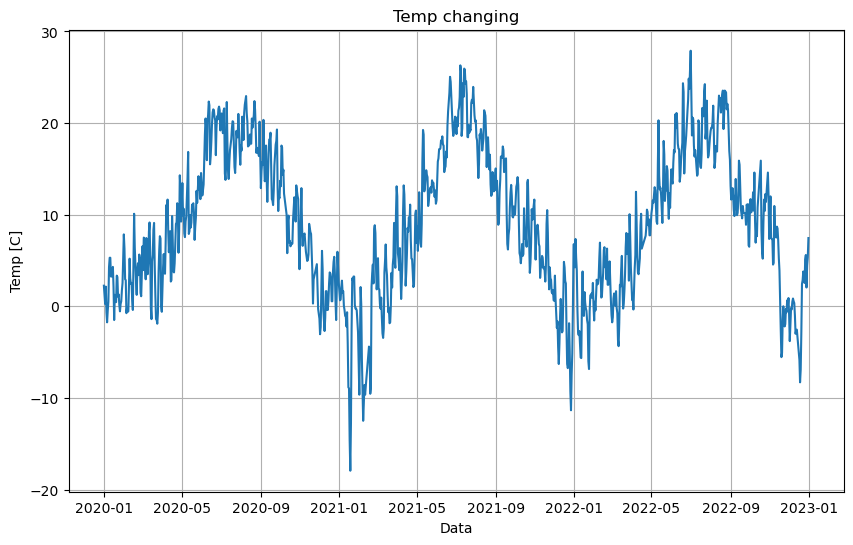

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(df['Data'], df['Temp [C]'])
plt.xlabel('Data')
plt.ylabel('Temp [C]')
plt.title('Temp changing')
plt.grid(True)
plt.show()

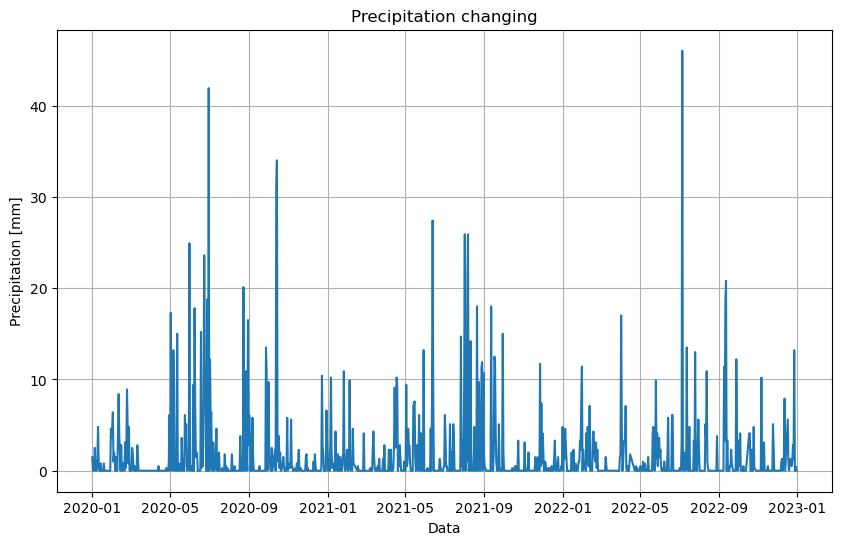

In [132]:
plt.figure(figsize=(10, 6))
plt.plot(df['Data'], df['Precipitation[mm]'])
plt.xlabel('Data')
plt.ylabel('Precipitation [mm]')
plt.title('Precipitation changing')
plt.grid(True)
plt.show()

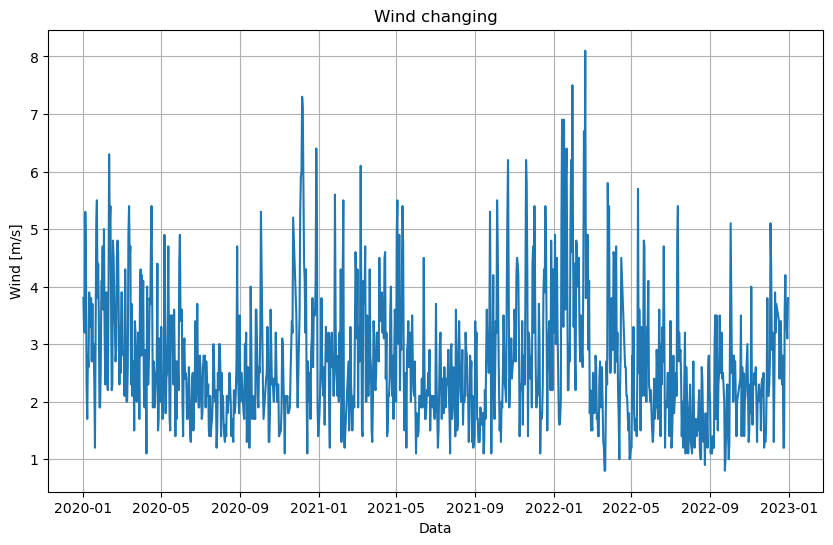

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(df['Data'], df['Wind[m/s]'])
plt.xlabel('Data')
plt.ylabel('Wind [m/s]')
plt.title('Wind changing')
plt.grid(True)
plt.show()

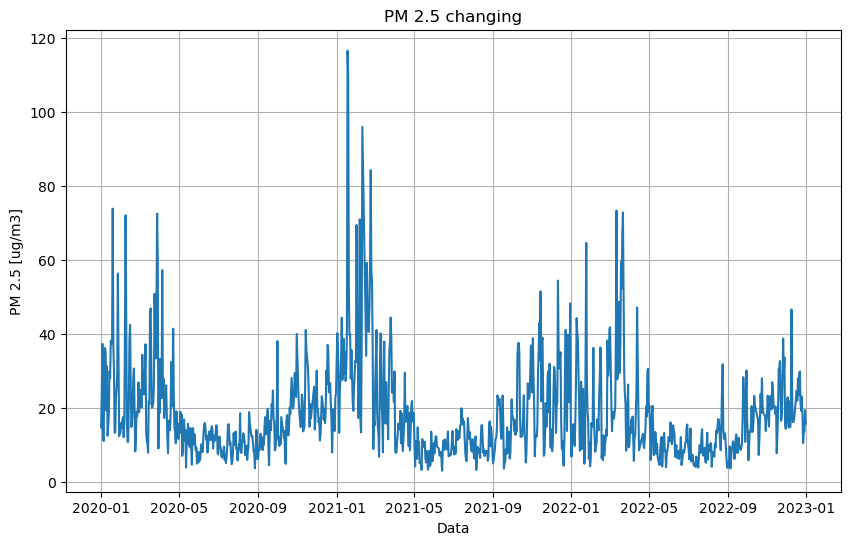

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(df['Data'], df['pollution air PM2.5 [ug/m3]'])
plt.xlabel('Data')
plt.ylabel('PM 2.5 [ug/m3]')
plt.title('PM 2.5 changing')
plt.grid(True)
plt.show()

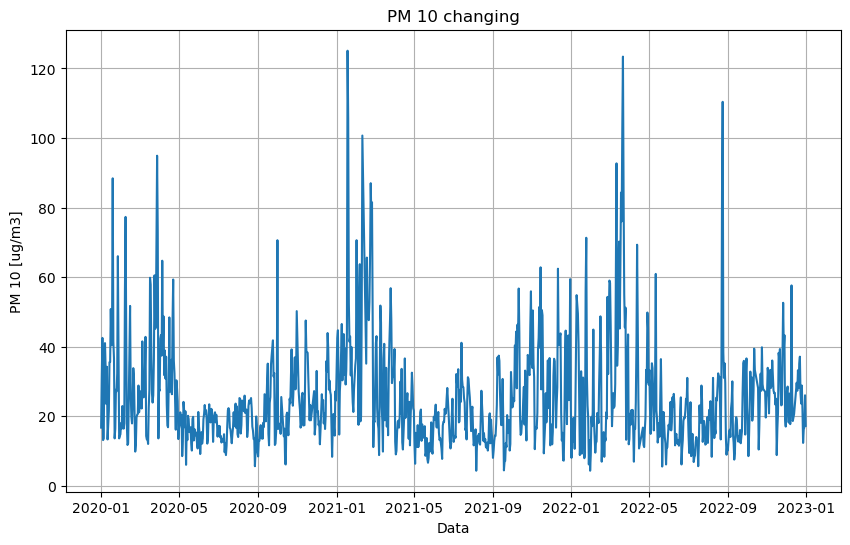

In [135]:
plt.figure(figsize=(10, 6))
plt.plot(df['Data'], df['pollution PM10 [ug/m3]'])
plt.xlabel('Data')
plt.ylabel('PM 10 [ug/m3]')
plt.title('PM 10 changing')
plt.grid(True)
plt.show()

<font color="black" face="Times New Roman" size="6"><b> Dataset Shaping for Modelling </b></font> 

In [136]:
X = df.iloc[:, :-3]  
ypm25 = df.iloc[:, -2]  
ypm10 = df.iloc[:, -1]

In [137]:
X_train, X_temp, y_train25, y_temp25 = train_test_split(X, ypm25, test_size=0.3, random_state=42)
X_val, X_test, y_val25, y_test25 = train_test_split(X_temp, y_temp25, test_size=0.5, random_state=42)
X_train = X_train.drop(columns=['Data'])
X_val = X_val.drop(columns=['Data'])
X_test = X_test.drop(columns=['Data'])
X_train.shape, X_test.shape, X_val.shape, y_train25.shape, y_test25.shape, y_val25.shape

((737, 5), (158, 5), (158, 5), (737,), (158,), (158,))

<font color="black" face="Times New Roman" size="6"><b> Creating Model for PM2.5 </b></font> 

In [138]:
def objective_pm25(trial):
    num_layers = trial.suggest_int('num_layers', 1, 5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)

    model_25 = tf.keras.Sequential()

    model_25.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

    for i in range(num_layers):
        num_units = trial.suggest_int(f'num_units_layer_{i}', 4, 128)
        model_25.add(tf.keras.layers.Dense(num_units, activation='relu'))

    model_25.add(tf.keras.layers.Dense(1))

    model_25.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mean_squared_error')

    model_25.fit(X_train,
              y_train25,
              epochs=200, 
              batch_size=64, 
              verbose=0)

    val_loss = model_25.evaluate(X_val,
                                 y_val25, 
                                 verbose=0)

    return val_loss

study_pm25 = optuna.create_study(direction='minimize')
study_pm25.optimize(objective_pm25, n_trials=100)

print('Best parameters for PM2.5: ', study_pm25.best_trial.params)

[I 2023-09-19 19:47:25,151] A new study created in memory with name: no-name-00c47c38-a29c-4713-81bd-8c69a6e35dd7
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 19:47:34,388] Trial 0 finished with value: 84.10369873046875 and parameters: {'num_layers': 5, 'learning_rate': 0.00013511128652529978, 'num_units_layer_0': 44, 'num_units_layer_1': 6, 'num_units_layer_2': 98, 'num_units_layer_3': 83, 'num_units_layer_4': 47}. Best is trial 0 with value: 84.10369873046875.
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com

G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 19:49:03,275] Trial 13 finished with value: 80.87371063232422 and parameters: {'num_layers': 2, 'learning_rate': 0.015109532017011056, 'num_units_layer_0': 126, 'num_units_layer_1': 37}. Best is trial 4 with value: 74.82559204101562.
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 19:49:10,023] 

G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 19:50:35,451] Trial 26 finished with value: 101.477294921875 and parameters: {'num_layers': 3, 'learning_rate': 0.015151399022407622, 'num_units_layer_0': 91, 'num_units_layer_1': 68, 'num_units_layer_2': 109}. Best is trial 4 with value: 74.82559204101562.
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2

G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 19:52:12,568] Trial 39 finished with value: 83.77537536621094 and parameters: {'num_layers': 4, 'learning_rate': 0.004080081556399842, 'num_units_layer_0': 56, 'num_units_layer_1': 25, 'num_units_layer_2': 21, 'num_units_layer_3': 71}. Best is trial 34 with value: 73.8720474243164.
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid

[I 2023-09-19 19:53:40,276] Trial 52 finished with value: 75.25929260253906 and parameters: {'num_layers': 2, 'learning_rate': 0.045751206971325474, 'num_units_layer_0': 29, 'num_units_layer_1': 40}. Best is trial 45 with value: 69.01173400878906.
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 19:53:51,851] Trial 53 finished with value: 79.09041595458984 and parameters: {'num_layers': 2, 'learning_rate': 0.009528716937432057, 'num_units_layer_0': 42, 'num_units_layer_1': 62}. Best is trial 45 with value: 69.01173400878906.
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Th

G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 19:55:36,977] Trial 66 finished with value: 70.88005065917969 and parameters: {'num_layers': 2, 'learning_rate': 0.019294817112699203, 'num_units_layer_0': 76, 'num_units_layer_1': 34}. Best is trial 45 with value: 69.01173400878906.
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 19:55:42,320] 

G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 19:56:54,165] Trial 80 finished with value: 78.89559173583984 and parameters: {'num_layers': 1, 'learning_rate': 0.03506018214574239, 'num_units_layer_0': 71}. Best is trial 45 with value: 69.01173400878906.
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 19:57:01,908] Trial 81 finished with val

G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 19:58:16,873] Trial 94 finished with value: 75.05452728271484 and parameters: {'num_layers': 1, 'learning_rate': 0.05715750883887948, 'num_units_layer_0': 67}. Best is trial 45 with value: 69.01173400878906.
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 19:58:22,076] Trial 95 finished with val

Best parameters for PM2.5:  {'num_layers': 2, 'learning_rate': 0.00976501612658467, 'num_units_layer_0': 46, 'num_units_layer_1': 47}


5/5 [==============================] - 0s 3ms/step


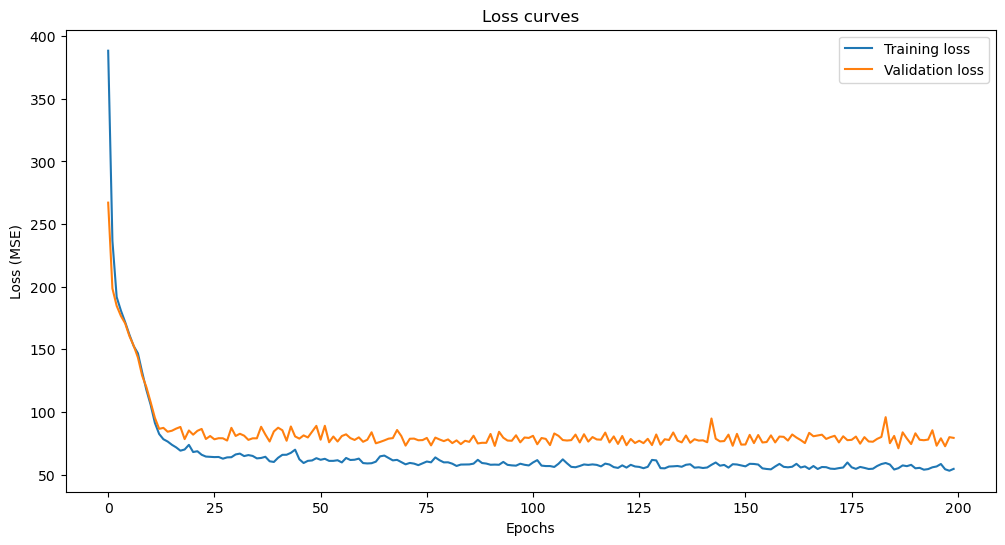

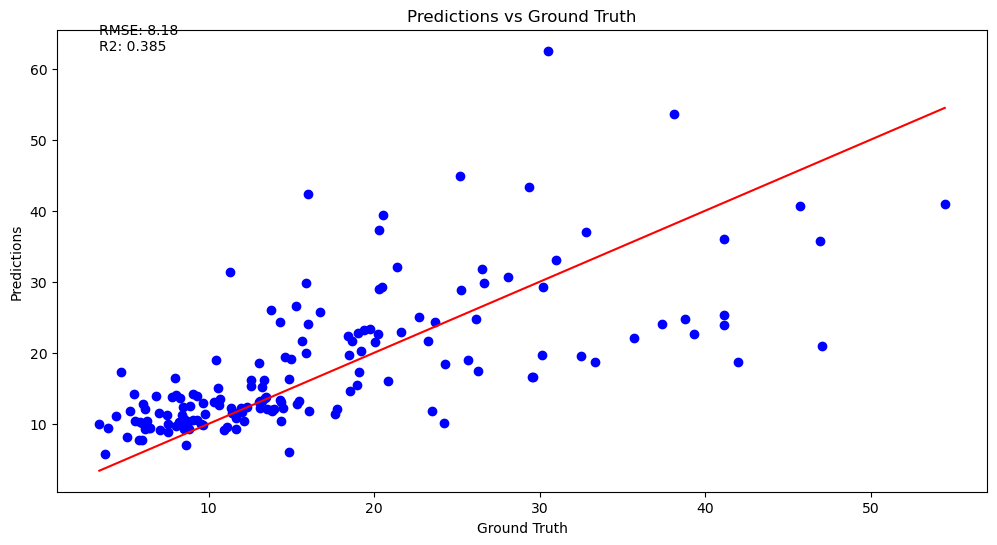

In [139]:
model_25 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(46, activation='relu'),  # num_units_layer_0: 68 - best
    tf.keras.layers.Dense(47, activation='relu'),  # num_units_layer_1: 48 - best
    #tf.keras.layers.Dense(98, activation='relu'),  # num_units_layer_2: 98 - best
    tf.keras.layers.Dense(1)])

model_25.compile(optimizer=tf.keras.optimizers.Adam(0.00976501612658467),
              loss=tf.keras.losses.MeanSquaredError())

history = model_25.fit(X_train, y_train25, validation_data=(X_val, y_val25), epochs=200, batch_size=64, verbose=0)


preds_25 = model_25.predict(X_test)

rmse_25 = np.sqrt(mean_squared_error(y_test25, preds_25))
r2_25 = r2_score(y_test25, preds_25)


plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(y_test25, preds_25, c='blue')
plt.plot([min(y_test25), max(y_test25)], [min(y_test25), max(y_test25)], color='red')
plt.title('Predictions vs Ground Truth')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.text(min(y_test25), max(preds_25), f'RMSE: {round(rmse_25, 3)}\nR2: {round(r2_25, 3)}')
plt.show()

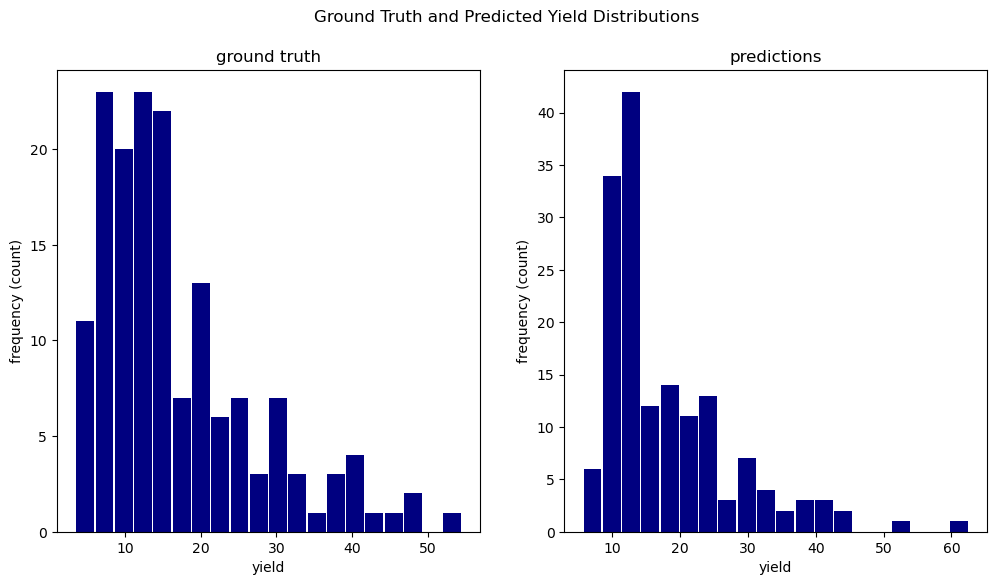

In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Ground Truth and Predicted Yield Distributions')

ax1.hist(y_test25, bins=20, rwidth=0.93, color='navy')
ax1.set_title('ground truth')
ax1.set_xlabel('yield')
ax1.set_ylabel('frequency (count)')

ax2.hist(preds_25, bins=20, rwidth=0.93, color='navy')
ax2.set_title('predictions')
ax2.set_xlabel('yield')
ax2.set_ylabel('frequency (count)')

plt.show()

<font color="black" face="Times New Roman" size="4"><b> Results for model PM2.5 </b></font> 

In [141]:
mae_25 = mean_absolute_error(y_test25, preds_25)

print(f'RMSE: {rmse_25}')
print(f'MAE: {mae_25}')
print(f'R2: {r2_25}')

RMSE: 8.180096145440954
MAE: 5.729918780997792
R2: 0.3854226823576121


<font color="black" face="Times New Roman" size="6"><b> Creating Model for PM10 </b></font> 

In [142]:
preds_25_train = model_25.predict(X_train)
preds_25_val = model_25.predict(X_val)
X_train['predicted_pm25'] = preds_25_train
X_val['predicted_pm25'] = preds_25_val
X_train.shape, X_val.shape

5/5 [==============================] - 0s 3ms/step


((737, 6), (158, 6))

In [143]:
_, _, y_train10, y_temp10 = train_test_split(X, ypm10, test_size=0.3, random_state=42)
_, _, y_val10, y_test10 = train_test_split(X_temp, y_temp10, test_size=0.5, random_state=42)
X_test['predicted_pm25'] = preds_25
X_train.shape, X_test.shape, X_val.shape, y_train10.shape, y_test10.shape, y_val10.shape

((737, 6), (158, 6), (158, 6), (737,), (158,), (158,))

In [144]:
def objective_pm10(trial):
    num_layers = trial.suggest_int('num_layers', 1, 5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)

    model_10 = tf.keras.Sequential()

    model_10.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

    for i in range(num_layers):
        num_units = trial.suggest_int(f'num_units_layer_{i}', 4, 128)
        model_10.add(tf.keras.layers.Dense(num_units, activation='relu'))

    model_10.add(tf.keras.layers.Dense(1))

    model_10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mean_squared_error')

    model_10.fit(X_train,
              y_train10,
              epochs=200, 
              batch_size=64, 
              verbose=0)

    val_loss = model_10.evaluate(X_val,
                                 y_val10, 
                                 verbose=0)

    return val_loss

study_pm10 = optuna.create_study(direction='minimize')
study_pm10.optimize(objective_pm10, n_trials=100)

print('Best parameters for PM10: ', study_pm10.best_trial.params)

[I 2023-09-19 20:00:20,270] A new study created in memory with name: no-name-ab7d7e3c-b081-44ac-b8b3-87e80c9e0f60
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 20:00:29,501] Trial 0 finished with value: 195.40280151367188 and parameters: {'num_layers': 4, 'learning_rate': 3.324189982200512e-05, 'num_units_layer_0': 5, 'num_units_layer_1': 83, 'num_units_layer_2': 58, 'num_units_layer_3': 124}. Best is trial 0 with value: 195.40280151367188.
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases

G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 20:01:55,203] Trial 13 finished with value: 155.84408569335938 and parameters: {'num_layers': 4, 'learning_rate': 0.01640619538011864, 'num_units_layer_0': 76, 'num_units_layer_1': 94, 'num_units_layer_2': 36, 'num_units_layer_3': 83}. Best is trial 11 with value: 133.0503692626953.
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoi

[I 2023-09-19 20:03:20,325] Trial 25 finished with value: 153.8628387451172 and parameters: {'num_layers': 5, 'learning_rate': 0.008855455910874116, 'num_units_layer_0': 51, 'num_units_layer_1': 96, 'num_units_layer_2': 46, 'num_units_layer_3': 52, 'num_units_layer_4': 12}. Best is trial 11 with value: 133.0503692626953.
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 20:03:27,792] Trial 26 finished with value: 152.32034301757812 and parameters: {'num_layers': 4, 'learning_rate': 0.004231584146668281, 'num_units_layer_0': 66, 'num_units_layer_1': 57, 'num_units_layer_2': 62, 'num_units_layer_3': 116}. Best is trial 11 with value: 133.0503692626953.
G:\pyton\anacon

[I 2023-09-19 20:04:46,259] Trial 38 finished with value: 146.54576110839844 and parameters: {'num_layers': 2, 'learning_rate': 0.011617809307975818, 'num_units_layer_0': 57, 'num_units_layer_1': 76}. Best is trial 11 with value: 133.0503692626953.
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 20:04:52,470] Trial 39 finished with value: 146.6009979248047 and parameters: {'num_layers': 3, 'learning_rate': 0.0027232154513091903, 'num_units_layer_0': 68, 'num_units_layer_1': 89, 'num_units_layer_2': 18}. Best is trial 11 with value: 133.0503692626953.
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has be

[I 2023-09-19 20:06:14,497] Trial 51 finished with value: 147.8477783203125 and parameters: {'num_layers': 5, 'learning_rate': 0.006721532782184246, 'num_units_layer_0': 36, 'num_units_layer_1': 32, 'num_units_layer_2': 65, 'num_units_layer_3': 25, 'num_units_layer_4': 96}. Best is trial 11 with value: 133.0503692626953.
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 20:06:21,710] Trial 52 finished with value: 171.91090393066406 and parameters: {'num_layers': 5, 'learning_rate': 0.014152553551868062, 'num_units_layer_0': 45, 'num_units_layer_1': 28, 'num_units_layer_2': 74, 'num_units_layer_3': 22, 'num_units_layer_4': 98}. Best is trial 11 with value: 133.050369

G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 20:07:45,529] Trial 64 finished with value: 281.4105224609375 and parameters: {'num_layers': 4, 'learning_rate': 0.015449102152357475, 'num_units_layer_0': 17, 'num_units_layer_1': 94, 'num_units_layer_2': 47, 'num_units_layer_3': 5}. Best is trial 11 with value: 133.0503692626953.
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid

G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 20:09:14,839] Trial 76 finished with value: 156.24729919433594 and parameters: {'num_layers': 5, 'learning_rate': 0.008206020230426622, 'num_units_layer_0': 58, 'num_units_layer_1': 86, 'num_units_layer_2': 22, 'num_units_layer_3': 39, 'num_units_layer_4': 119}. Best is trial 11 with value: 133.0503692626953.
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipyke

G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipykernel package so we can avoid doing imports until
[I 2023-09-19 20:10:55,078] Trial 88 finished with value: 138.8229217529297 and parameters: {'num_layers': 5, 'learning_rate': 0.0027096620470729122, 'num_units_layer_0': 95, 'num_units_layer_1': 113, 'num_units_layer_2': 89, 'num_units_layer_3': 55, 'num_units_layer_4': 119}. Best is trial 11 with value: 133.0503692626953.
G:\pyton\anaconda\envs\main_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  This is separate from the ipyk

Best parameters for PM10:  {'num_layers': 4, 'learning_rate': 0.004123357647368857, 'num_units_layer_0': 42, 'num_units_layer_1': 110, 'num_units_layer_2': 38, 'num_units_layer_3': 63}


5/5 [==============================] - 0s 3ms/step


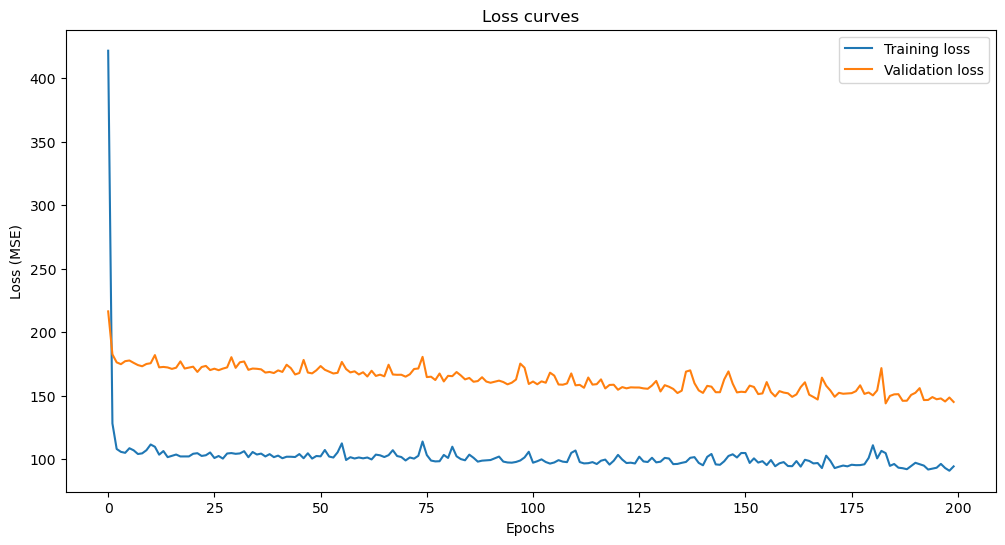

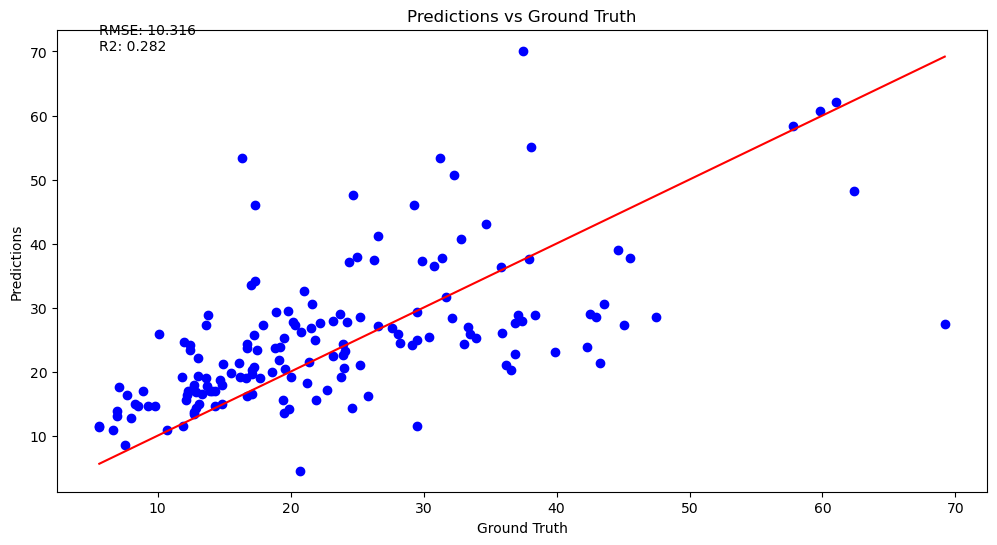

In [145]:
model_10 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(42, activation='relu'),  # num_units_layer_0: 42 - best
    tf.keras.layers.Dense(110, activation='relu'),  # num_units_layer_1: 110 - best
    tf.keras.layers.Dense(38, activation='relu'),  # num_units_layer_2: 38 - best
    tf.keras.layers.Dense(63, activation='relu'),  # num_units_layer_3: 63 - best
    #tf.keras.layers.Dense(55, activation='relu'),  # num_units_layer_4: 55 - best
    tf.keras.layers.Dense(1)])

model_10.compile(optimizer=tf.keras.optimizers.Adam(0.004123357647368857),
              loss=tf.keras.losses.MeanSquaredError())
history = model_10.fit(X_train, y_train10, validation_data=(X_val, y_val10), epochs=200, batch_size=64, verbose=0)

preds_10 = model_10.predict(X_test)

rmse_10 = np.sqrt(mean_squared_error(y_test10, preds_10))
r2_10 = r2_score(y_test10, preds_10)


plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(y_test10, preds_10, c='blue')
plt.plot([min(y_test10), max(y_test10)], [min(y_test10), max(y_test10)], color='red')
plt.title('Predictions vs Ground Truth')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.text(min(y_test10), max(preds_10), f'RMSE: {round(rmse_10, 3)}\nR2: {round(r2_10, 3)}')
plt.show()

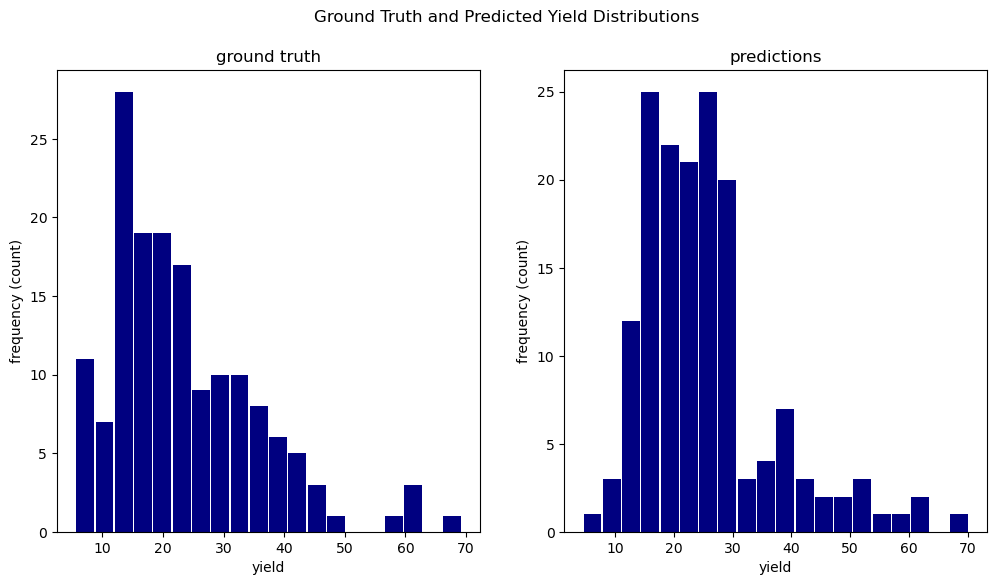

In [146]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Ground Truth and Predicted Yield Distributions')

ax1.hist(y_test10, bins=20, rwidth=0.93, color='navy')
ax1.set_title('ground truth')
ax1.set_xlabel('yield')
ax1.set_ylabel('frequency (count)')

ax2.hist(preds_10, bins=20, rwidth=0.93, color='navy')
ax2.set_title('predictions')
ax2.set_xlabel('yield')
ax2.set_ylabel('frequency (count)')

plt.show()

<font color="black" face="Times New Roman" size="4"><b> Results for model PM10 </b></font> 

In [147]:
mae_10 = mean_absolute_error(y_test10, preds_10)

print(f'RMSE: {rmse_10}')
print(f'MAE: {mae_10}')
print(f'R2: {r2_10}')

RMSE: 10.315975379344033
MAE: 7.6207107006749
R2: 0.28186123022617116


<font color="black" face="Times New Roman" size="6"><b> Predictions for Air Quality using predictions </b></font> 

In [148]:
df_to_quality = X_test
df_to_quality

,Temp [C],season,free_day_or_weekend,Precipitation[mm],Wind[m/s],predicted_pm25
455,9.00,1.0,0.0,0.0,2.1,22.339994
777,-3.70,0.0,0.0,0.5,1.8,39.398014
900,15.10,2.0,1.0,4.8,2.9,9.414849
721,0.50,0.0,0.0,0.0,5.1,16.079428
944,16.95,2.0,0.0,0.0,2.8,9.225818
...,...,...,...,...,...,...
715,-2.90,0.0,0.0,1.3,3.2,25.745239
677,0.65,3.0,0.0,0.8,4.7,13.956476
869,15.90,1.0,1.0,0.0,1.4,10.669072
977,10.25,3.0,0.0,1.3,5.1,10.149371


In [149]:
df_to_quality['predicted_pm10'] = preds_10
df_to_quality

,Temp [C],season,free_day_or_weekend,Precipitation[mm],Wind[m/s],predicted_pm25,predicted_pm10
455,9.00,1.0,0.0,0.0,2.1,22.339994,37.105297
777,-3.70,0.0,0.0,0.5,1.8,39.398014,46.046696
900,15.10,2.0,1.0,4.8,2.9,9.414849,11.463047
721,0.50,0.0,0.0,0.0,5.1,16.079428,22.642817
944,16.95,2.0,0.0,0.0,2.8,9.225818,16.904278
...,...,...,...,...,...,...,...
715,-2.90,0.0,0.0,1.3,3.2,25.745239,30.483250
677,0.65,3.0,0.0,0.8,4.7,13.956476,16.405828
869,15.90,1.0,1.0,0.0,1.4,10.669072,19.231138
977,10.25,3.0,0.0,1.3,5.1,10.149371,14.633879


In [150]:
df_to_quality['predicted_Air_Quality'] = df_to_quality.apply(lambda row: air_quality(row['predicted_pm10'], row['predicted_pm25']), axis=1)
df_to_quality

,Temp [C],season,free_day_or_weekend,Precipitation[mm],Wind[m/s],predicted_pm25,predicted_pm10,predicted_Air_Quality
455,9.00,1.0,0.0,0.0,2.1,22.339994,37.105297,Good
777,-3.70,0.0,0.0,0.5,1.8,39.398014,46.046696,Moderate
900,15.10,2.0,1.0,4.8,2.9,9.414849,11.463047,Very Good
721,0.50,0.0,0.0,0.0,5.1,16.079428,22.642817,Good
944,16.95,2.0,0.0,0.0,2.8,9.225818,16.904278,Very Good
...,...,...,...,...,...,...,...,...
715,-2.90,0.0,0.0,1.3,3.2,25.745239,30.483250,Good
677,0.65,3.0,0.0,0.8,4.7,13.956476,16.405828,Good
869,15.90,1.0,1.0,0.0,1.4,10.669072,19.231138,Very Good
977,10.25,3.0,0.0,1.3,5.1,10.149371,14.633879,Very Good


In [151]:
df_to_quality['Air_Quality_real'] = df.loc[df_to_quality.index, 'Air Quality']
df_to_quality

,Temp [C],season,free_day_or_weekend,Precipitation[mm],Wind[m/s],predicted_pm25,predicted_pm10,predicted_Air_Quality,Air_Quality_real
455,9.00,1.0,0.0,0.0,2.1,22.339994,37.105297,Good,2.0
777,-3.70,0.0,0.0,0.5,1.8,39.398014,46.046696,Moderate,2.0
900,15.10,2.0,1.0,4.8,2.9,9.414849,11.463047,Very Good,1.0
721,0.50,0.0,0.0,0.0,5.1,16.079428,22.642817,Good,2.0
944,16.95,2.0,0.0,0.0,2.8,9.225818,16.904278,Very Good,1.0
...,...,...,...,...,...,...,...,...,...
715,-2.90,0.0,0.0,1.3,3.2,25.745239,30.483250,Good,2.0
677,0.65,3.0,0.0,0.8,4.7,13.956476,16.405828,Good,1.0
869,15.90,1.0,1.0,0.0,1.4,10.669072,19.231138,Very Good,1.0
977,10.25,3.0,0.0,1.3,5.1,10.149371,14.633879,Very Good,1.0


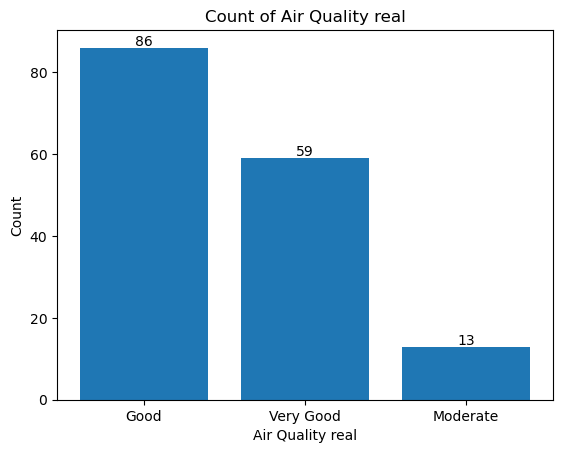

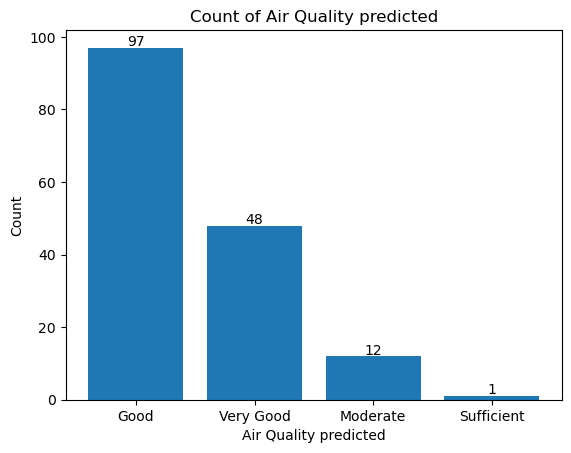

In [152]:
reversed_quality_mapping = {value: key for key, value in quality_mapping.items()}
df_to_quality['Air_Quality_real'] = df_to_quality['Air_Quality_real'].map(reversed_quality_mapping)

counts_real = df_to_quality['Air_Quality_real'].value_counts()
counts_predicted = df_to_quality['predicted_Air_Quality'].value_counts()

plt.bar(counts_real.index, counts_real.values)
for index, value in enumerate(counts_real.values):
    plt.text(index, value + 0.5, str(value), ha='center')
plt.xlabel('Air Quality real')
plt.ylabel('Count')
plt.title('Count of Air Quality real')
plt.show()

plt.bar(counts_predicted.index, counts_predicted.values)
for index, value in enumerate(counts_predicted.values):
    plt.text(index, value + 0.5, str(value), ha='center')
plt.xlabel('Air Quality predicted')
plt.ylabel('Count')
plt.title('Count of Air Quality predicted')
plt.show()

<font color="black" face="Times New Roman" size="6"><b> Saving Models </b></font> 

In [153]:
model_10.save('G:\\ml_projects\\siedlce_air\\model_10')
model_25.save('G:\\ml_projects\\siedlce_air\\model_25')

INFO:tensorflow:Assets written to: G:\ml_projects\siedlce_air\model_10\assets
INFO:tensorflow:Assets written to: G:\ml_projects\siedlce_air\model_25\assets
